In [1]:
from pycigar.envs import Env
import yaml

import numpy as np
from scipy import signal
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

class FooEnv(Env):
    @property
    def observation_space(self):
        return Box(low=-float('inf'), high=float('inf'),
                   shape=(5,), dtype=np.float64)

    @property
    def action_space(self):
        return Box(low=0.5, high=1.5, shape=(5,), dtype=np.float64)

    def step(self, rl_actions=None, randomize_rl_update=None):
        """See parent class.
        """

        for _ in range(self.sim_params['env_config']["sims_per_step"]):
            self.env_time += 1
            
            # perform action update for PV inverter device
            if len(self.k.device.group_controllers.keys()) > 0:
                control_setting = []
                devices = []
                for group_controller_name, group_controller in self.k.device.group_controllers.items():
                    action = group_controller.get_action(self)
                    if isinstance(action, tuple):
                        if isinstance(group_controller.device_id, str):
                            devices.extend([group_controller.device_id])
                            control_setting.extend((action,))
                        else:
                            devices.extend(group_controller.device_id)
                            control_setting.extend((action,)*len(group_controller.device_id))
                    elif isinstance(action, dict):
                        devices.extend(action.keys())
                        control_setting.extend(action.values())
                self.k.device.apply_control(devices, control_setting)

            # perform action update for PV inverter device
            if len(self.k.device.get_local_device_ids()) > 0:
                control_setting = []
                for device_id in self.k.device.get_local_device_ids():
                    action = self.k.device.get_controller(device_id).get_action(self)
                    control_setting.append(action)
                self.k.device.apply_control(self.k.device.get_local_device_ids(), control_setting)


            self.additional_command()

            if self.k.time <= self.k.t:
                self.k.update(reset=False)

                # check whether the simulator sucessfully solved the powerflow
                converged = self.k.simulation.check_converged()
                if not converged:
                    break

            if self.k.time >= self.k.t:
                break

        # the episode will be finished if it is not converged.
        done = not converged or (self.k.time == self.k.t)
        obs = self.get_state()
        infos = {}
        reward = self.compute_reward(rl_actions)

        return obs, reward, done, infos

    def get_state(self):
        return [0, 0, 0, 0, 0]

    def compute_reward(self, rl_actions, **kwargs):
        return 0

stream = open("./IEEE_37_Node/pycigar_config_ieee_37_dist_storage.yaml", "r")
# stream = open("./IEEE_37_Node/store_file.yaml", "r")
sim_params = yaml.safe_load(stream)

print('Simulation Complete')

Simulation Complete


In [2]:
from pycigar.utils.registry import register_devcon
from pycigar.controllers.battery_storage_controller import BatteryStorageController
from pycigar.devices.battery_storage_device import BatteryStorageDevice
from pycigar.devices.battery_storage_device_advanced import BatteryStorageDeviceAdvanced

# from pycigar.controllers.battery_peak_shaving_controller import BatteryPeakShavingController
from pycigar.controllers.battery_peak_shaving_controller_cent import BatteryPeakShavingControllerCent
from pycigar.controllers.battery_peak_shaving_controller_dist import BatteryPeakShavingControllerDist

# register_devcon('battery_storage_controller', BatteryStorageController)
# register_devcon('battery_peak_shaving_controller', BatteryPeakShavingController)
register_devcon('battery_peak_shaving_controller_dist', BatteryPeakShavingControllerDist)
register_devcon('battery_peak_shaving_controller_cent', BatteryPeakShavingControllerCent)
register_devcon('battery_storage_device_advanced', BatteryStorageDeviceAdvanced)


'battery_storage_device_advanced'

In [3]:
env = FooEnv(sim_params)
env.reset()
done = False
while not done:
    _, _, done, _ = env.step()
    # if env.k.time % 60 == 0:
    #     print('Time: ' + str(env.k.time))
    # if env.k.time >= 55:
    #     done = True
    
print('Simulation Complete')

psc_bsd_s701a
psc_bsd_s701b
psc_bsd_s701c
bsd_s701a
720000000.0
1000.0
bsd_s701b
720000000.0
1000.0
bsd_s701c
720000000.0
1000.0
bsd_s701a
720000000.0
1000.0
bsd_s701b
720000000.0
1000.0
bsd_s701c
720000000.0
1000.0
Time: 51
Initialize: psc_bsd_s701a
Time: 51
Initialize: psc_bsd_s701b
Time: 51
Initialize: psc_bsd_s701c
Simulation Complete


In [4]:
from pycigar.utils.logging import logger

Logger = logger()

Logger.log_dict.keys()

dict_keys(['psc_bsd_s701a', 'psc_bsd_s701b', 'psc_bsd_s701c', 'pv_inverter_S701a', 'pv_inverter_S701b', 'pv_inverter_S701c', 'bsd_s701a', 'bsd_s701b', 'bsd_s701c', 's701a', 's701b', 's701c', 's712c', 's713c', 's714a', 's714b', 's718a', 's720c', 's722b', 's722c', 's724b', 's725b', 's727c', 's728', 's729a', 's730c', 's731b', 's732c', 's733a', 's734c', 's735c', 's736b', 's737a', 's738a', 's740c', 's741c', 's742a', 's742b', 's744a', 'network'])

In [5]:
env.k.device.devices

{'pv_inverter_S701a': {'device': <pycigar.devices.pv_inverter_device.PVDevice at 0x7f0295607bd0>,
  'controller': <pycigar.controllers.fixed_controller.FixedController at 0x7f0295607d90>,
  'node_id': 's701a'},
 'bsd_s701a': {'device': <pycigar.devices.battery_storage_device_advanced.BatteryStorageDeviceAdvanced at 0x7f0295607cd0>,
  'controller': <pycigar.controllers.battery_peak_shaving_controller_dist.BatteryPeakShavingControllerDist at 0x7f02cffbdb50>,
  'node_id': 's701a'},
 'pv_inverter_S701b': {'device': <pycigar.devices.pv_inverter_device.PVDevice at 0x7f02a3458390>,
  'controller': <pycigar.controllers.fixed_controller.FixedController at 0x7f0295607f10>,
  'node_id': 's701b'},
 'bsd_s701b': {'device': <pycigar.devices.battery_storage_device_advanced.BatteryStorageDeviceAdvanced at 0x7f0295607e10>,
  'controller': <pycigar.controllers.battery_peak_shaving_controller_dist.BatteryPeakShavingControllerDist at 0x7f02955f5910>,
  'node_id': 's701b'},
 'pv_inverter_S701c': {'device':

In [6]:

Logger.log_dict.keys()

Logger.log_dict['pv_inverter_S701b'].keys()


dict_keys(['y', 'u', 'p_set', 'q_set', 'p_out', 'q_out', 'control_setting', 'sbar_solarirr', 'sbar_pset', 'pset_pmax', 'q_avail_real', 'solar_irr', 'node'])

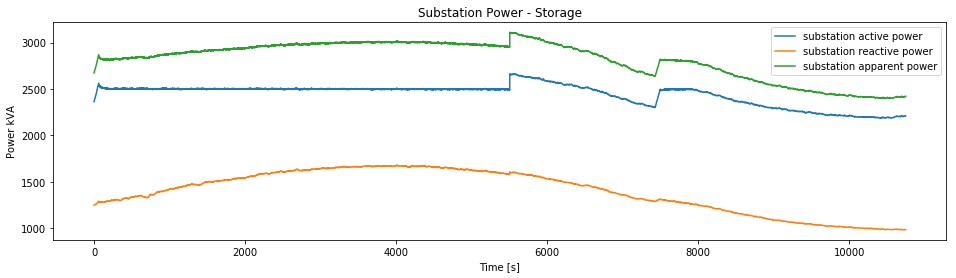

In [13]:

fig1 = plt.figure(figsize = [16, 4])
plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,0],label="substation active power")
plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,1],label="substation reactive power")
plt.plot((np.asarray(Logger.log_dict['network']['substation_power'])[:,0]**2 + np.asarray(Logger.log_dict['network']['substation_power'])[:,1]**2)**0.5,label="substation apparent power")
plt.title('Substation Power - Storage')
plt.xlabel('Time [s]')
plt.ylabel('Power kVA')
plt.legend()

plt.show()

# fig1.savefig('/home/michael/Desktop/temp/sub_power_storage.png')

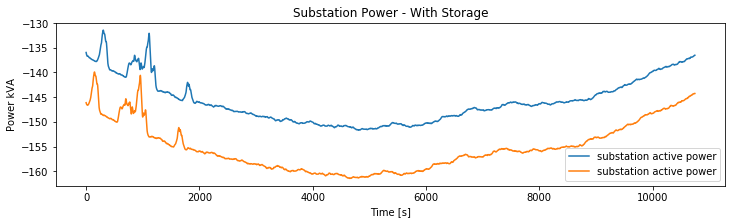

In [8]:

fig1 = plt.figure(figsize = [12, 3])
plt.plot(Logger.log_dict['pv_inverter_S701a']['p_out'],label="substation active power")
plt.plot(Logger.log_dict['pv_inverter_S701b']['p_out'],label="substation active power")
plt.title('Substation Power - With Storage')
plt.xlabel('Time [s]')
plt.ylabel('Power kVA')
plt.legend()

plt.show()

# fig1.savefig('/home/michael/Desktop/temp/sub_power_storage.png')

In [9]:
# Logger.log_dict['bsd_671a'].keys()
# Logger.log_dict['bsd_1']['SOC']


# fig1 = plt.figure(figsize = [16, 4])
# plt.plot(Logger.log_dict['network']['substation_top_voltage'],'--',label="bsd_1_psc P target")
# plt.plot(Logger.log_dict['network']['substation_bottom_voltage'],label="bsd_1_psc P meas lpf")
# # plt.plot(Logger.log_dict['bsd_2_psc']['measured_active_power'],label="P meas")
# # plt.plot(Logger.log_dict['bsd_2_psc']['measured_active_power_lpf'],label="bsd_2_psc P meas lpf")
# # plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.ylabel('Voltage [p.u.]')
# plt.legend()

fig1 = plt.figure(figsize = [16, 4])
plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,0],'--',label="substation active power")
plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,1],'--',label="substation reactive power")
# plt.plot(Logger.log_dict['bsd_2_psc']['measured_active_power'],label="P meas")
# plt.plot(Logger.log_dict['bsd_2_psc']['measured_active_power_lpf'],label="bsd_2_psc P meas lpf")
# plt.title('Battery State of Charge - External Control')
plt.xlabel('Time [s]')
plt.ylabel('Power [p.u.]')
plt.legend()



fig1 = plt.figure(figsize = [12, 3])
plt.plot(Logger.log_dict['psc_bsd_671a']['p_target'],'--',label="psc_bsd_671a P target")
plt.plot(Logger.log_dict['psc_bsd_671a']['measured_active_power_lpf'],label="psc_bsd_671a P meas lpf")
plt.plot(Logger.log_dict['psc_bsd_671b']['p_target'],'--',label="psc_bsd_671b P target")
plt.plot(Logger.log_dict['psc_bsd_671b']['measured_active_power_lpf'],label="psc_bsd_671b P meas lpf")
plt.plot(Logger.log_dict['psc_bsd_671c']['p_target'],'--',label="psc_bsd_671c P target")
plt.plot(Logger.log_dict['psc_bsd_671c']['measured_active_power_lpf'],label="psc_bsd_671c P meas lpf")
# plt.plot(Logger.log_dict['bsd_2_psc']['measured_active_power'],label="P meas")
# plt.plot(Logger.log_dict['bsd_2_psc']['measured_active_power_lpf'],label="bsd_2_psc P meas lpf")
# plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.xlabel('SOC')
plt.title('PSC Power Measured and Setpoint')
plt.xlabel('Time [s]')
plt.ylabel('Power [kW]')
plt.legend()

fig1.savefig('/home/michael/Desktop/temp/psc_active_power.png')


# fig1 = plt.figure(figsize = [16, 4])
# plt.plot(Logger.log_dict['bsd_1_psc']['p_set'],label="bsd_1_psc p_set")
# plt.plot(Logger.log_dict['bsd_2_psc']['p_set'],label="bsd_2_psc p_set")
# plt.plot(Logger.log_dict['bsd_3_psc']['p_set'],label="bsd_3_psc p_set")
# # plt.plot(Logger.log_dict['bsd_1_psc']['measured_active_power_lpf'],label="P meas lpf")
# # plt.title('Battery State of Charge - External Control')
# # plt.xlabel('Time [s]')
# # plt.xlabel('SOC')
# plt.legend()

fig1 = plt.figure(figsize = [12, 3])
plt.plot(np.array(Logger.log_dict['bsd_671a']['p_in'])/1e3,label="bsd_671a p_in")
plt.plot(np.array(Logger.log_dict['bsd_671a']['p_out'])/1e3,'--',label="bsd_671a p_out")
plt.plot(np.array(Logger.log_dict['bsd_671b']['p_in'])/1e3,label="bsd_671b p_in")
plt.plot(np.array(Logger.log_dict['bsd_671b']['p_out'])/1e3,'--',label="bsd_671b p_out")
plt.plot(np.array(Logger.log_dict['bsd_671c']['p_in'])/1e3,label="bsd_671b p_in")
plt.plot(np.array(Logger.log_dict['bsd_671c']['p_out'])/1e3,'--',label="bsd_671b p_out")
plt.title('BSD Power')
plt.xlabel('Time [s]')
plt.ylabel('Power [kW]')
plt.legend()

fig1.savefig('/home/michael/Desktop/temp/bsd_power.png')


fig1 = plt.figure(figsize = [12, 3])
plt.plot(np.array(Logger.log_dict['bsd_671a']['SOC']),label="bsd_671a SOC")
plt.plot(np.array(Logger.log_dict['bsd_671b']['SOC']),label="bsd_671b SOC")
plt.plot(np.array(Logger.log_dict['bsd_671c']['SOC']),label="bsd_671b SOC")
plt.title('BSD SOC')
plt.xlabel('Time [s]')
plt.ylabel('SOC')
plt.legend()

fig1.savefig('/home/michael/Desktop/temp/bsd_SOC.png')



# fig1 = plt.figure(figsize = [16, 4])
# plt.plot(Logger.log_dict['bsd_1']['SOC'],label="bsd_1 SOC")
# plt.plot(Logger.log_dict['bsd_2']['SOC'],label="bsd_2 SOC")
# plt.plot(Logger.log_dict['bsd_3']['SOC'],label="bsd_3 SOC")
# # plt.plot(Logger.log_dict['bsd_1_psc']['measured_active_power_lpf'],label="P meas lpf")
# # plt.title('Battery State of Charge - External Control')
# # plt.xlabel('Time [s]')
# # plt.xlabel('SOC')
# plt.legend()

fig1 = plt.figure(figsize = [16, 4])
plt.plot(Logger.log_dict['671']['p'],label="671 p")
plt.plot(Logger.log_dict['671']['kw'],label="671 kw")
plt.plot(Logger.log_dict['671']['q'],label="671 q")
plt.plot(Logger.log_dict['671']['kvar'],label="671 kvar")
# plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.xlabel('SOC')
plt.legend()

fig1 = plt.figure(figsize = [16, 4])
plt.plot(Logger.log_dict['pv_671']['p_set'],label="pv_671 p_set")
plt.plot(Logger.log_dict['pv_671']['p_out'],label="pv_671 p_out")
plt.plot(Logger.log_dict['pv_671']['q_set'],label="pv_671 q_set")
plt.plot(Logger.log_dict['pv_671']['q_out'],label="pv_671 q_out")
# plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.xlabel('SOC')
plt.legend()

fig1 = plt.figure(figsize = [16, 4])
plt.plot(Logger.log_dict['671']['kw'],label="671 kw")
plt.plot(Logger.log_dict['671']['p'],label="671 p")
# plt.plot(Logger.log_dict['pv_671']['p_out'],label="pv_671 p_out")
# plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.xlabel('SOC')
plt.legend()


plt.show()

# fig1.savefig('/home/michael/Desktop/temp/SOC.png')

KeyError: 'psc_bsd_671a'

In [10]:
print(Logger.log_dict['network']['substation_power'][0])

[ -134.87587051 -1003.05699332]


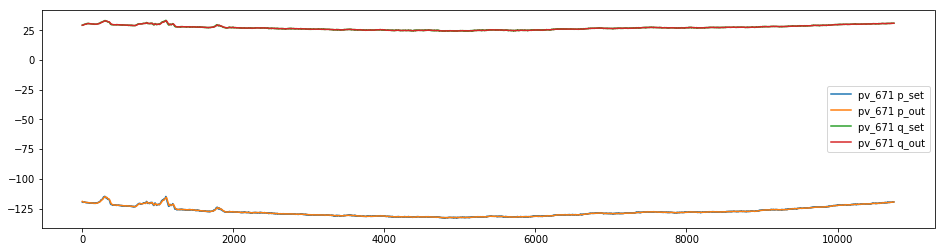

In [11]:
fig1 = plt.figure(figsize = [16, 4])
plt.plot(Logger.log_dict['pv_671']['p_set'],label="pv_671 p_set")
plt.plot(Logger.log_dict['pv_671']['p_out'],label="pv_671 p_out")
plt.plot(Logger.log_dict['pv_671']['q_set'],label="pv_671 q_set")
plt.plot(Logger.log_dict['pv_671']['q_out'],label="pv_671 q_out")
# plt.plot(Logger.log_dict['pv_671b']['SOC'],label="bsd_2 SOC")
# plt.plot(Logger.log_dict['pv_671c']['SOC'],label="bsd_3 SOC")
# plt.plot(Logger.log_dict['bsd_1_psc']['measured_active_power_lpf'],label="P meas lpf")
# plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.xlabel('SOC')
plt.legend()

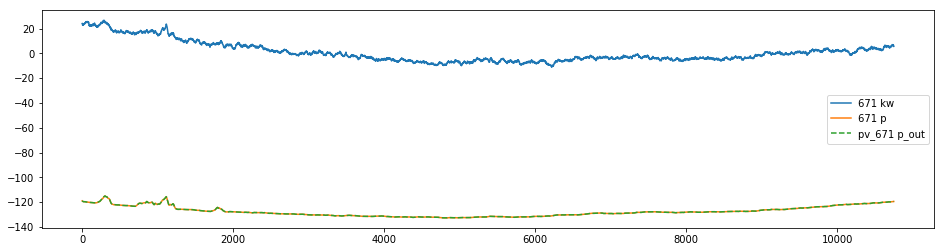

In [12]:
fig1 = plt.figure(figsize = [16, 4])
plt.plot(Logger.log_dict['671']['kw'],label="671 kw")
plt.plot(Logger.log_dict['671']['p'],label="671 p")
plt.plot(Logger.log_dict['pv_671']['p_out'],'--',label="pv_671 p_out")
# plt.title('Battery State of Charge - External Control')
# plt.xlabel('Time [s]')
# plt.xlabel('SOC')
plt.legend()

In [10]:

import pycigar
from pycigar.utils.input_parser import input_parser

misc_inputs_path = pycigar.DATA_DIR + "/../zzz/IEEE_37_Node/misc_inputs.csv"
dss_path = pycigar.DATA_DIR + "/../zzz/IEEE_37_Node/ieee37.dss"
load_solar_path = pycigar.DATA_DIR + "/../zzz/IEEE_37_Node/load_solar_data.csv"
breakpoints_path = pycigar.DATA_DIR + "/../zzz/IEEE_37_Node/breakpoints.csv"
battery_path = None

benchmark = False
percentage_hack = 0.0




sim_params = input_parser(misc_inputs_path, dss_path, load_solar_path, breakpoints_path, battery_path, benchmark, percentage_hack) 

with open(pycigar.DATA_DIR + '/../zzz/IEEE_37_Node/store_file.yaml', 'w') as file:
    documents = yaml.dump(sim_params, file)


14400
Index(['S701a', 'S701b', 'S701c', 'S712c', 'S713c', 'S714a', 'S714b', 'S718a',
       'S720c', 'S722b', 'S722c', 'S724b', 'S725b', 'S727c', 'S728', 'S729a',
       'S730c', 'S731b', 'S732c', 'S733a', 'S734c', 'S735c', 'S736b', 'S737a',
       'S738a', 'S740c', 'S741c', 'S742a', 'S742b', 'S744a', 'S701a_pv',
       'S701b_pv', 'S701c_pv', 'S712c_pv', 'S713c_pv', 'S714a_pv', 'S714b_pv',
       'S718a_pv', 'S720c_pv', 'S722b_pv', 'S722c_pv', 'S724b_pv', 'S725b_pv',
       'S727c_pv', 'S728_pv', 'S729a_pv', 'S730c_pv', 'S731b_pv', 'S732c_pv',
       'S733a_pv', 'S734c_pv', 'S735c_pv', 'S736b_pv', 'S737a_pv', 'S738a_pv',
       'S740c_pv', 'S741c_pv', 'S742a_pv', 'S742b_pv', 'S744a_pv'],
      dtype='object')


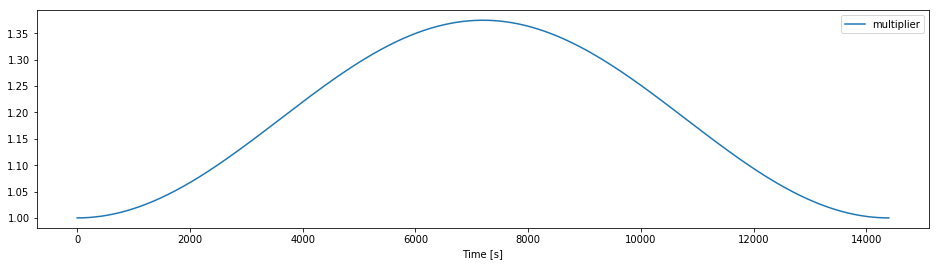

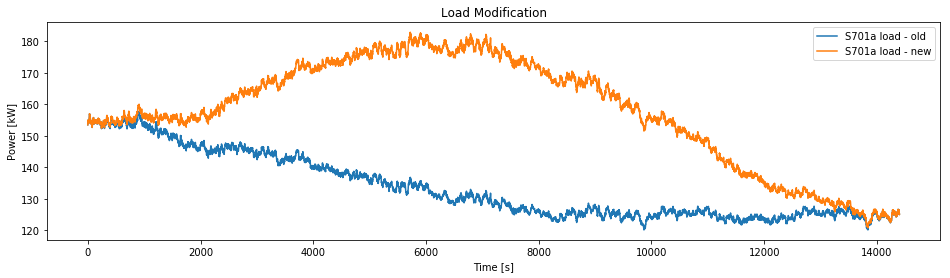

In [12]:
import pandas as pd
# network_data_directory_path = sim_params['scenario_config']['network_data_directory']
profile_old = pd.read_csv('IEEE_37_Node/load_solar_data.csv')

t0 = 0
tf = len(profile_old)
print(tf)

multtime = np.arange(t0,tf)

mult = 1 + 0.375*0.5*(1 + -np.cos(2*np.pi*(multtime - t0)/(tf - t0)))

profile_new = profile_old.copy()

print(profile_old.keys())

for colname in profile_old.keys():
    if 'pv' not in colname:
        # print(colname)
        profile_new[colname] = mult*profile_old[colname]


profile_new.to_csv('IEEE_37_Node/load_solar_data_peak_shaving.csv')

fig1 = plt.figure(figsize = [16, 4])
plt.plot(mult,label="multiplier")
# plt.plot(Logger.log_dict['pv_inverter_S701b']['p_out'],label="substation active power")
plt.title('')
plt.xlabel('Time [s]')
# plt.ylabel('Power kVA')
plt.legend()


fig1 = plt.figure(figsize = [16, 4])
plt.plot(profile_old['S701a'],label="S701a load - old")
plt.plot(profile_new['S701a'],label="S701a load - new")
# plt.plot(Logger.log_dict['pv_inverter_S701b']['p_out'],label="substation active power")
plt.title('Load Modification')
plt.xlabel('Time [s]')
plt.ylabel('Power [kW]')
plt.legend()

plt.show()

# fig1.savefig('/home/michael/Desktop/temp/sub_power_storage.png')